In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
import pandas as pd


file_path = ("C:/Users/SARAVANA DEVI/Downloads/credit_fraud.csv")
try:
    data = pd.read_csv("C:/creditcard.csv")
    print(data.head())
except FileNotFoundError:
    print(f"Error: The file {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")





   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:

data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


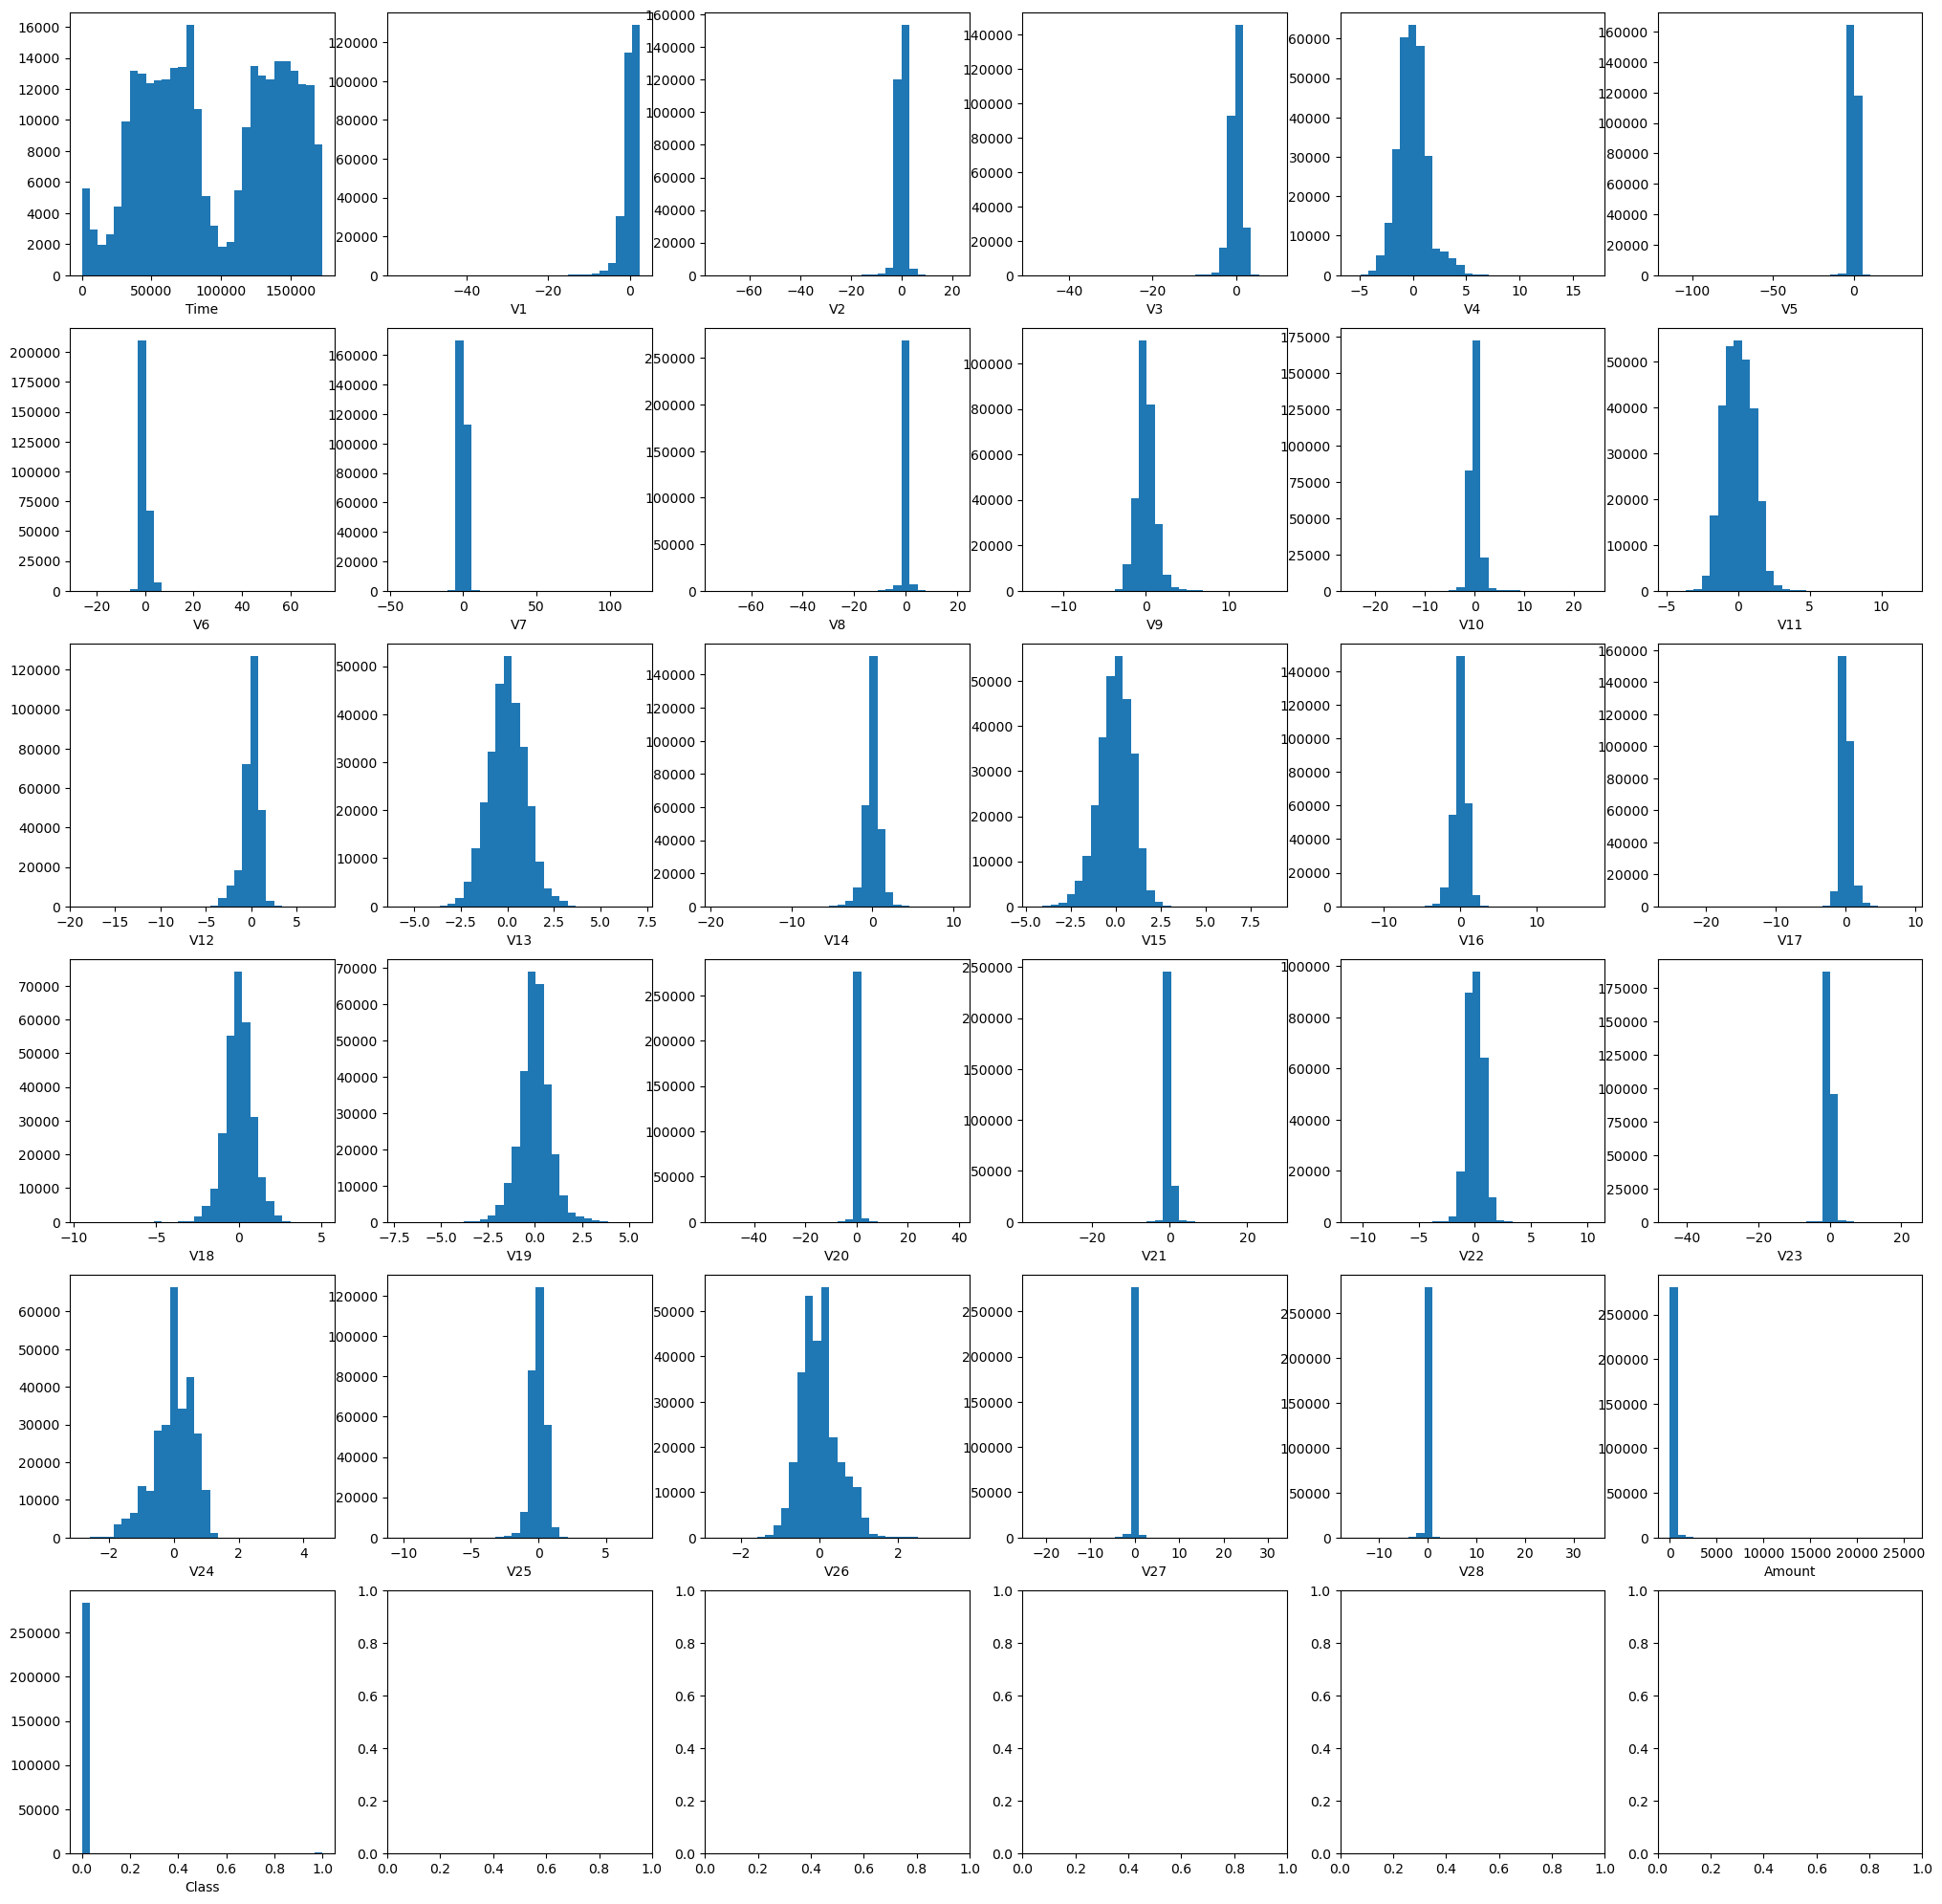

In [5]:

fig, ax = plt.subplots(6, 6, figsize=(25, 25))
for idx, column in enumerate(data.columns):
    row = idx // 6
    col = idx % 6
    ax[row, col].hist(data[column], bins=30)
    ax[row, col].set_xlabel(column)

In [6]:

data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Transactions')

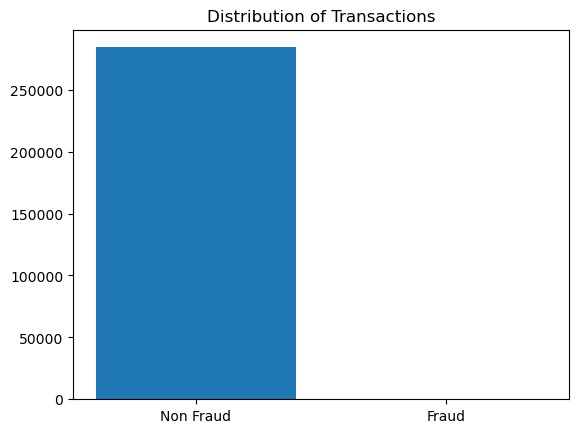

In [7]:

number_of_classes = data['Class'].value_counts()

plt.bar(number_of_classes.index, number_of_classes.values)
plt.xticks([0, 1], labels=['Non Fraud', 'Fraud'])
plt.title('Distribution of Transactions')

In [8]:

from sklearn.preprocessing import StandardScaler, RobustScaler

data['Amount'] = RobustScaler().fit_transform(data['Amount'].to_numpy().reshape(-1, 1))
data['Time'] = StandardScaler().fit_transform(data['Time'].to_numpy().reshape(-1, 1))

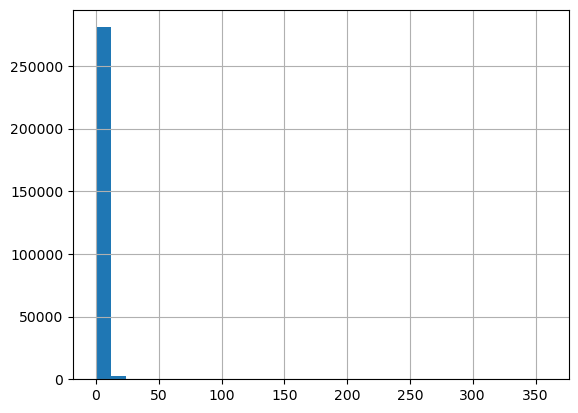

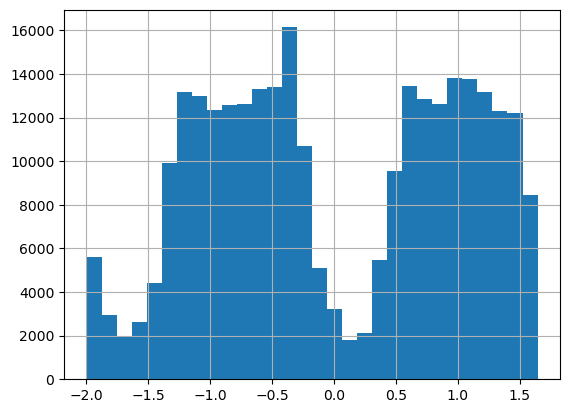

In [9]:

for col in ['Amount', 'Time']:
    data[col].hist(bins=30)
    plt.show()

In [10]:

X = data.drop('Class', axis=1)
y = data['Class']

ss = StratifiedShuffleSplit(n_splits=5)

for train_index, test_index in ss.split(X, y):
    original_Xtrain, original_ytrain = X.iloc[train_index], y.iloc[train_index]
    original_Xtest, original_ytest = X.iloc[test_index], y.iloc[test_index]

In [11]:

df = data.sample(frac=1)

fraud = df.query('Class == 1')
non_fraud = df.query('Class == 0')[:492]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6774,-1.817001,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,-0.293440,1
107067,-0.516843,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,4.137637,1
27738,-1.266210,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1
150677,-0.019686,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,0.116118,1
215132,0.950494,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,9.798225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83417,-0.736477,-3.215382,-0.364223,-1.261883,3.794949,0.711206,-1.316476,-5.165141,0.625278,-1.582301,...,0.401341,0.152191,-0.934675,-0.256148,-0.469403,-0.282496,0.866077,-0.433466,-0.224831,1
226814,1.052773,-2.405207,2.943823,-7.616654,3.533374,-5.417494,-0.112632,-1.329372,1.709417,-2.322716,...,0.652683,0.414132,0.023869,-0.260616,0.405316,0.029107,0.519807,-0.469537,9.020471,1
33276,-1.213923,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,-0.135401,1
201601,0.824294,0.523820,1.531708,-4.176390,3.584615,-1.023954,-0.502471,-1.891966,0.878417,-1.541942,...,0.851859,1.176927,0.453553,0.485211,-0.500687,-0.108284,0.269477,-0.063245,1.512052,1


In [12]:

balanced_df = pd.DataFrame(pd.concat([fraud, non_fraud]), columns=df.columns)

In [13]:

balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6774,-1.817001,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,-0.293440,1
107067,-0.516843,-1.512516,1.133139,-1.601052,2.813401,-2.664503,-0.310371,-1.520895,0.852996,-1.496495,...,0.729828,0.485286,0.567005,0.323586,0.040871,0.825814,0.414482,0.267265,4.137637,1
27738,-1.266210,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,1.443443,1
150677,-0.019686,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,...,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,0.116118,1
215132,0.950494,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,9.798225,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196286,0.771165,-1.104973,0.705277,-0.040584,-1.936419,-0.072359,-0.110988,-0.098879,-0.206522,-0.395592,...,0.553000,1.223589,-0.023088,0.606049,-0.933216,-0.387758,-1.009102,0.352612,0.000000,0
220356,0.996422,2.055719,0.692928,-3.147301,0.596161,1.379989,-1.246445,0.756230,-0.355270,-0.344196,...,-0.002134,0.204936,-0.052393,0.554020,0.375397,0.662121,-0.077665,-0.021732,-0.296793,0
7481,-1.782213,-1.049107,-0.108803,2.217496,-0.933951,0.833895,-0.938369,0.543082,-0.524145,1.162840,...,-0.214712,-0.121070,0.163134,0.324974,-0.395007,0.614762,-0.474480,-0.290557,-0.153706,0
126707,-0.352717,-1.687865,1.032640,0.319760,-0.725512,-0.136534,-0.390298,0.413605,0.738051,-1.313092,...,-0.289481,-1.331665,-0.142954,-0.475511,0.115391,0.678030,-0.376189,-0.199192,0.921819,0


In [14]:

number_of_new_classes = balanced_df['Class'].value_counts()
number_of_new_classes

Class
1    492
0    492
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of classes after undersampling')

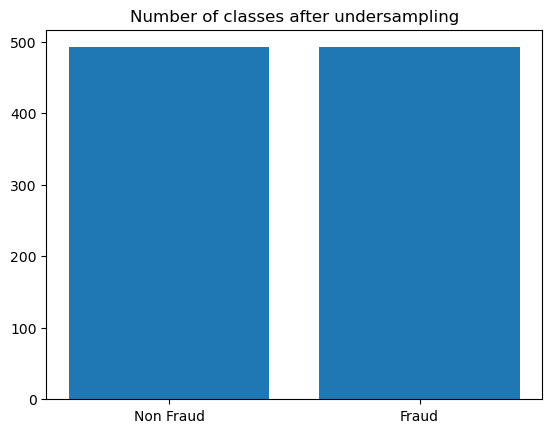

In [15]:

plt.bar(number_of_new_classes.index, number_of_new_classes.values)
plt.xticks([0, 1], labels=['Non Fraud', 'Fraud'])
plt.title('Number of classes after undersampling')

<Axes: >

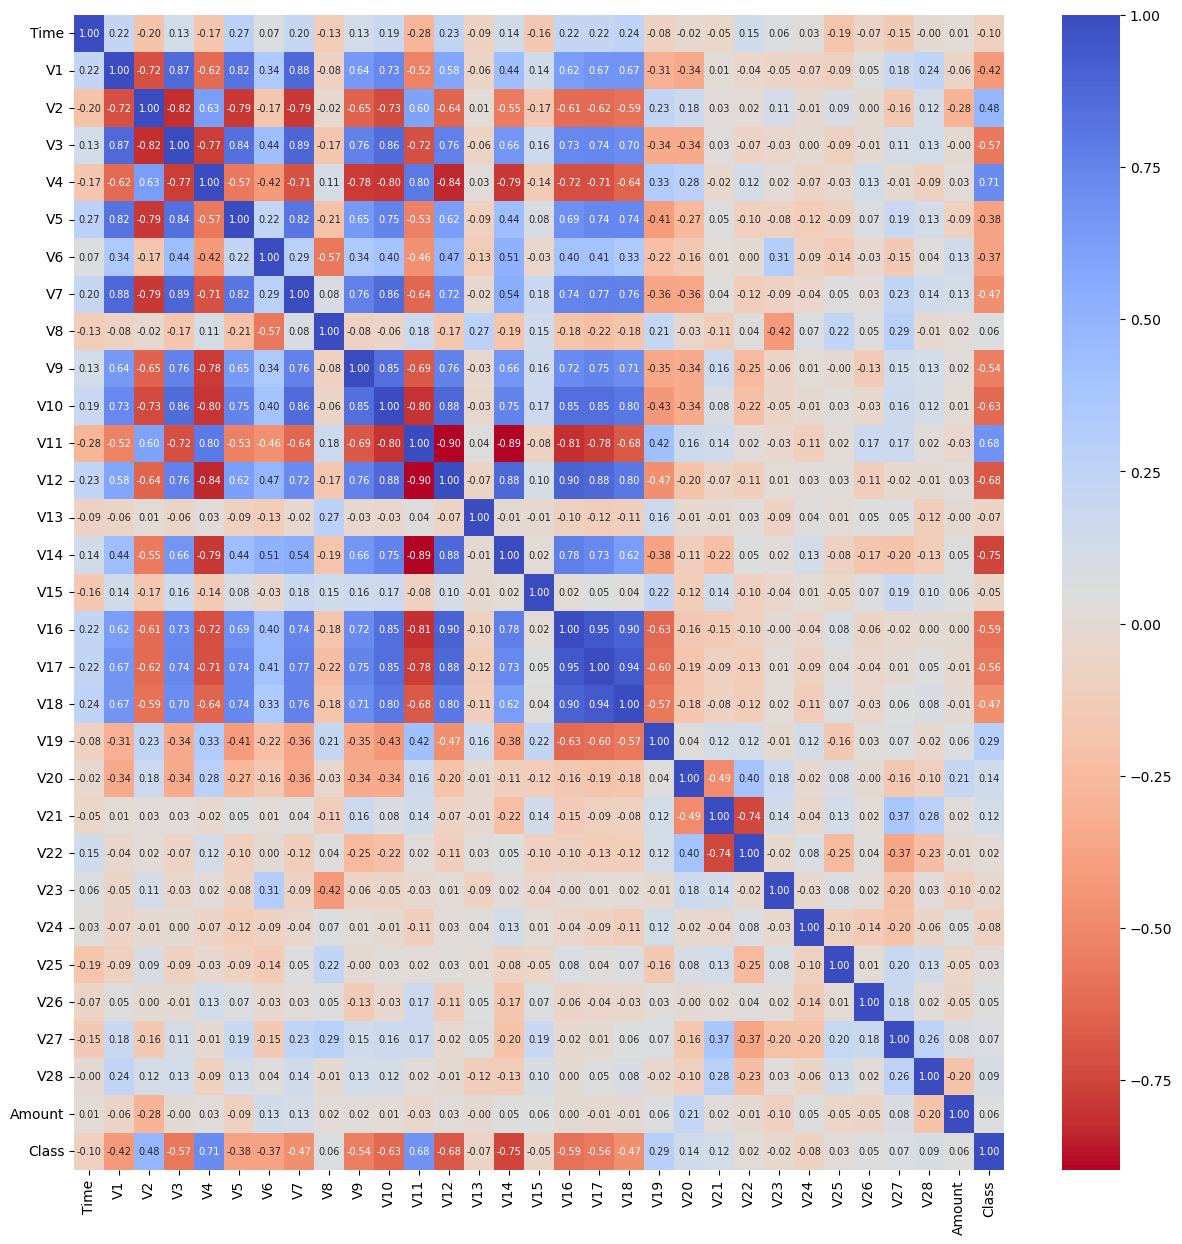

In [16]:

plt.figure(figsize=(15, 15))
correlation = balanced_df.corr()
sns.heatmap(correlation, cmap='coolwarm_r', annot_kws={'size':7}, annot=True, fmt='.2f')

In [17]:
print(correlation['Class'].sort_values())

V14      -0.749125
V12      -0.684978
V10      -0.627557
V16      -0.592315
V3       -0.570227
V17      -0.559860
V9       -0.541350
V7       -0.474096
V18      -0.469336
V1       -0.422674
V5       -0.376464
V6       -0.371803
Time     -0.101314
V24      -0.075179
V13      -0.072012
V15      -0.053551
V23      -0.017301
V22       0.016815
V25       0.026043
V26       0.050736
Amount    0.058573
V8        0.064692
V27       0.074105
V28       0.094049
V21       0.123987
V20       0.144969
V19       0.294082
V2        0.475011
V11       0.678662
V4        0.713964
Class     1.000000
Name: Class, dtype: float64


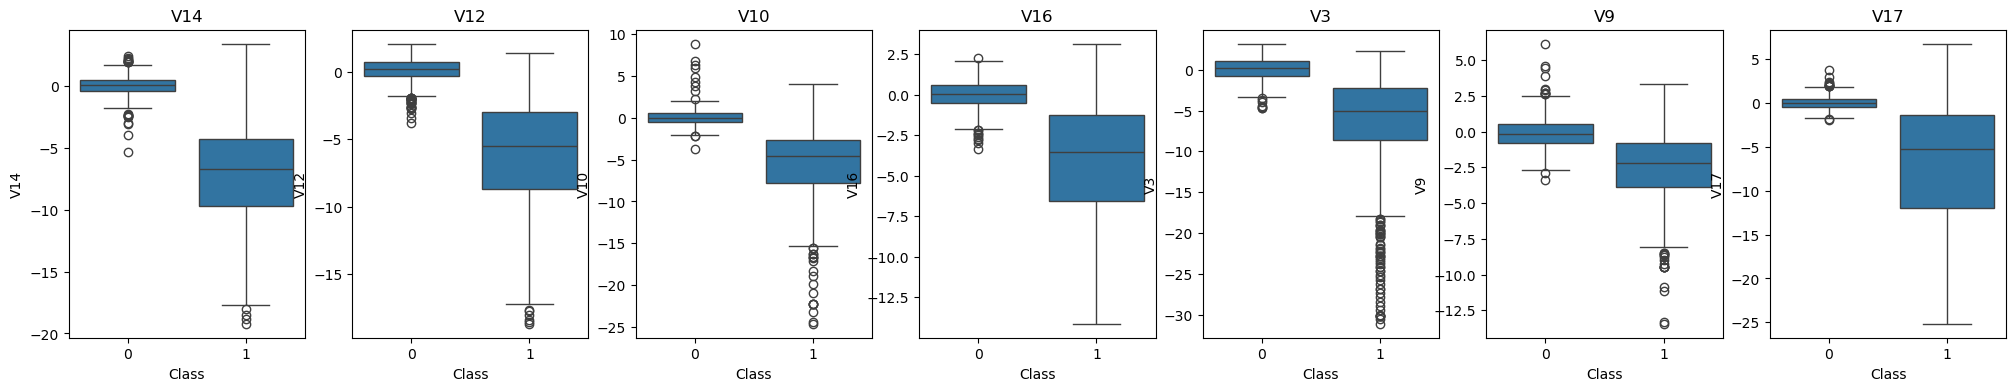

In [18]:

fig, axes = plt.subplots(ncols=7, figsize=(25, 4))

negative_correlation = ['V14', 'V12', 'V10', 'V16', 'V3', 'V9', 'V17']

for idx, col in enumerate(negative_correlation):
    sns.boxplot(data=balanced_df, x='Class', y=col, ax=axes[idx])
    axes[idx].set_title(col)

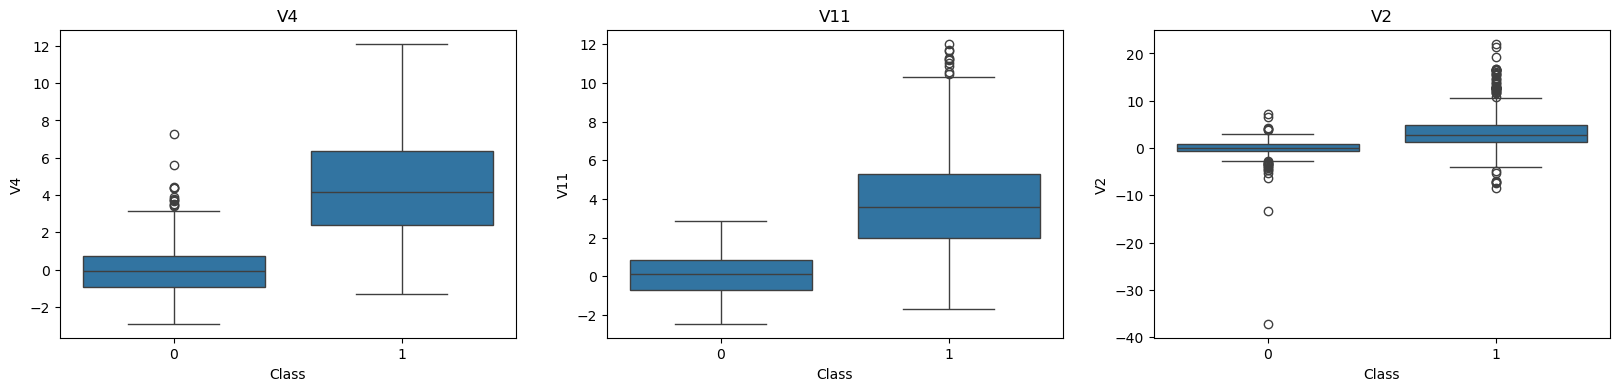

In [19]:

fig, axes = plt.subplots(ncols=3, figsize=(20, 4))

positive_correletions = ['V4', 'V11', 'V2']

for idx, col in enumerate(positive_correletions):
    sns.boxplot(data=balanced_df, x='Class', y=col, ax=axes[idx])
    axes[idx].set_title(col)

In [20]:

print(f'Number of samples before outlier removal {len(balanced_df)}')

q1 = balanced_df.quantile(0.25)
q3 = balanced_df.quantile(0.75)

IQR = q3 - q1

lower_band = q1 - IQR * 1.5
upper_band = q3 + IQR * 1.5


for col in negative_correlation + positive_correletions:    
    balanced_df = balanced_df[(balanced_df[col] >= lower_band[col]) & (balanced_df[col] <= upper_band[col])]


    
print(f'Number of samples after outlier removal {len(balanced_df)}')

Number of samples before outlier removal 984
Number of samples after outlier removal 845


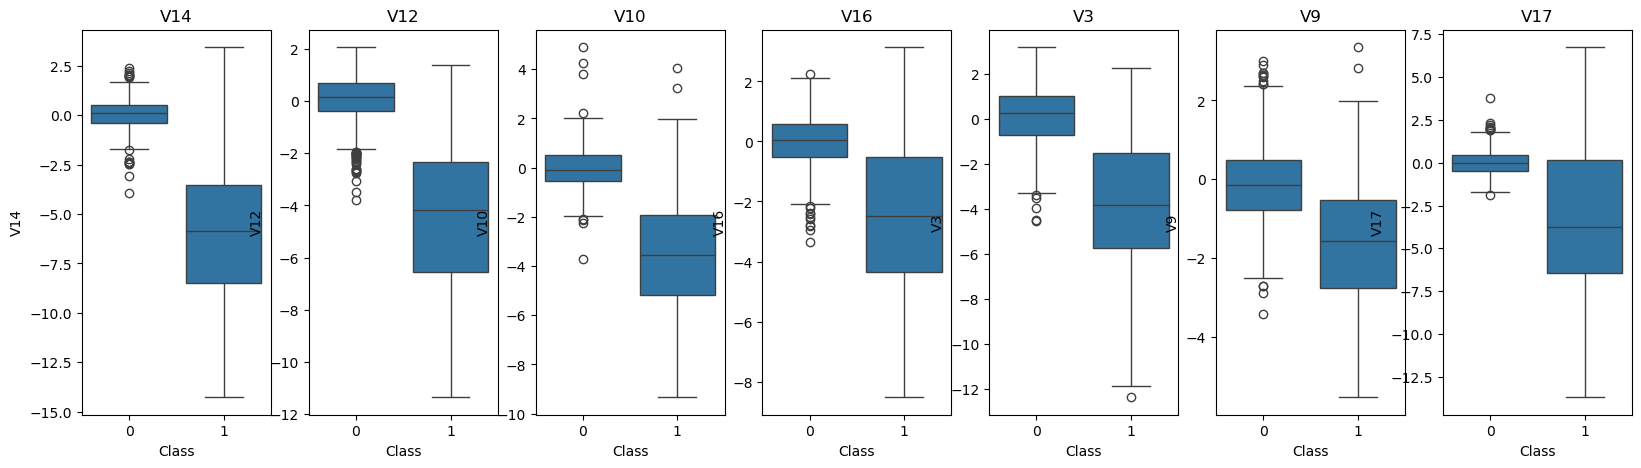

In [21]:

fig, axes = plt.subplots(ncols=7, figsize=(20, 5))

for idx, col in enumerate(negative_correlation):
    sns.boxplot(data=balanced_df, x='Class', y=col, ax=axes[idx])
    axes[idx].set_title(col)

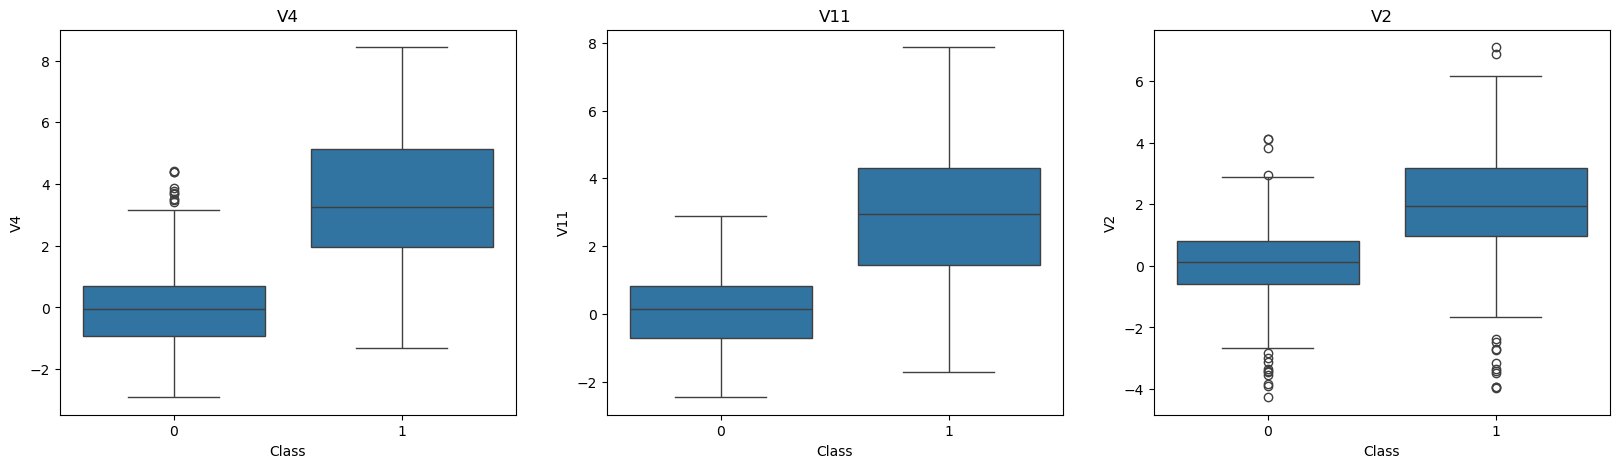

In [22]:

fig, axes = plt.subplots(ncols=3, figsize=(20, 5))

for idx, col in enumerate(positive_correletions):
    sns.boxplot(balanced_df, x='Class', y=col, ax=axes[idx])
    axes[idx].set_title(col)

In [23]:

grid_models = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
}


grid_params = {
    'LogisticRegression': {
        'penalty': ['l2'],
        'tol': [1e-4, 1e-3],
        'n_jobs': [-1],
        'max_iter': [1000],
        'C': [0.001, 0.01],
        'class_weight': [{0:1, 1:3}]
    },
    'SGDClassifier': {
       'eta0': [0.001, 0.01],   
       'tol': [1e-3, 1e-4],
       'loss': ['log_loss'],
        'max_iter': [1000],
        'class_weight': [{0:1, 1:3}]
    },
}

In [24]:

def train_model(X, y, result_holder, cv=None):
    for model_name, param in grid_params.items():
                    
        model = grid_models[model_name]
                    
        grid_search = GridSearchCV(model, scoring='recall',  param_grid=param, cv=cv)
                    
        grid_search.fit(X, y)
                    
        y_pred = grid_search.predict(original_Xtest)    
                    
        cm = confusion_matrix(original_ytest, y_pred)
        
        y_pred_proba = grid_search.predict_proba(original_Xtest)[:, 1]
    
        fpr, tpr, _ = roc_curve(original_ytest, y_pred_proba)
    
        roc_auc = auc(fpr, tpr)
                
        if model_name not in result_holder:
            result_holder[model_name] = {'Accuracy': [], 'RocAucScore': [], 'Recall': [], 'CM': None, 'fpr': None, 'tpr': None, 'roc_auc': None}
          
                
        result_holder[model_name]['Accuracy'].append(accuracy_score(original_ytest, y_pred))
        result_holder[model_name]['RocAucScore'].append(roc_auc_score(original_ytest, y_pred))
        result_holder[model_name]['Recall'].append(recall_score(original_ytest, y_pred))
        
        if  result_holder[model_name]['CM'] is None:
             result_holder[model_name]['CM'] = cm
            
        if  result_holder[model_name]['tpr'] is None and  result_holder[model_name]['fpr'] is None:
            result_holder[model_name]['tpr'] = tpr
            result_holder[model_name]['fpr'] = fpr
            result_holder[model_name]['roc_auc'] = roc_auc
            

def print_results(results_first, results_second, title):
    print(f'Cross-validation after {title}')
    for model_name, param in grid_models.items():
        print(model_name)
        print(f"Recall Score: {np.mean(results_first[model_name]['Recall'])}")
        print(f"Roc Auc Score: {np.mean(results_first[model_name]['RocAucScore'])}")
        print(f"Accuracy Score: {np.mean(results_first[model_name]['Accuracy'])}\n")
    
    print(f'Cross-validation before {title}')
    for model_name, param in grid_models.items():
        print(model_name)
        print(f"Recall Score: {np.mean(results_second[model_name]['Recall'])}")
        print(f"Roc Auc Score: {np.mean(results_second[model_name]['RocAucScore'])}")
        print(f"Accuracy Score: {np.mean(results_second[model_name]['Accuracy'])}\n")
        

def visualize_results(results_first, results_second, title):
    for model_name in grid_models: 
        plt.figure(figsize=(20, 8))
        plt.subplot(1, 3, 1)
        plt.bar(x=[f'{title} after cross-validation', f'{title} before cross-validation'], height=[np.mean(results_first[model_name]['Recall']), results_second[model_name]['Recall'][0]])
        plt.title(f'{model_name} Recall')
        plt.xticks(size=8)
        plt.subplot(1, 3, 2)
        plt.bar(x=[f'{title} after cross-validation', f'{title} before cross-validation'], height=[np.mean(results_first[model_name]['RocAucScore']), results_second[model_name]['RocAucScore'][0]])
        plt.title(f'{model_name} RocAucScore')
        plt.xticks(size=8)
        plt.subplot(1, 3, 3)
        plt.bar(x=[f'{title} after cross-validation', f'{title} before cross-validation'], height=[np.mean(results_first[model_name]['Accuracy']), results_second[model_name]['Accuracy'][0]])
        plt.title(f'{model_name} Accuracy')
        plt.xticks(size=8)
        
        plt.show()

   
    for model_name in grid_models:
        
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2, 1)
        sns.heatmap(results_first[model_name]['CM'], annot=True, fmt='g')
        plt.title(f'{model_name} - {title} before cross-validation')
        plt.xticks(ticks=[0.5,1.5], labels=['Non Fraud', 'Fraud'])
        plt.yticks(ticks=[0.5,1.5], labels=['Non Fraud', 'Fraud'])
        plt.subplot(1, 2, 2)
        sns.heatmap(results_second[model_name]['CM'], annot=True, fmt='g')
        plt.title(f'{model_name} - {title} after cross-validation')
        plt.xticks(ticks=[0.5, 1.5], labels=['None Fraud', 'Fraud'])
        plt.yticks(ticks=[0.5,1.5], labels=['Non Fraud', 'Fraud'])
        plt.show()
        
    
    for model_name in grid_models:
        fpr_before, tpr_before = results_first[model_name]['fpr'], results_first[model_name]['tpr']
        fpr_after, tpr_after = results_second[model_name]['fpr'], results_second[model_name]['tpr']
        
        plt.figure(figsize=(20, 5))
        plt.subplot(1, 2, 1)
        plt.plot(fpr_before, tpr_before, lw=2, label=f'{model_name}')
        plt.plot([0, 1], [0, 1], lw=3, linestyle='-')
        plt.title(f'Roc Auc Score for Undersampling Before Cross-Validation - {model_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.grid()
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(fpr_after, tpr_after, lw=2, label=f'{model_name}')
        plt.plot([0, 1], [0, 1], lw=3, linestyle='-')
        plt.title(f'Roc Auc Score for Undesampling After Cross-Validation - {model_name}')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.grid()
        plt.legend()
        plt.show()
        

In [25]:
 
results = {}


X_under = balanced_df.drop('Class', axis=1)
y_under = balanced_df['Class']


train_model(X_under, y_under, results, cv=5)

In [26]:

results_after = {}


X = data.drop('Class', axis=1)
y = data['Class']


sampler = RandomUnderSampler(random_state=23, sampling_strategy='majority')


for train_index, test_index in ss.split(X, y):
    
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]
    X_test, y_test = X.iloc[test_index], y.iloc[test_index]
    
    X_under_after, y_under_after = sampler.fit_resample(X_train, y_train)
    
    train_model(X_under_after, y_under_after, results_after)

In [27]:
 
print_results(results, results_after, title='Undersampling')

Cross-validation after Undersampling
LogisticRegression
Recall Score: 0.9183673469387755
Roc Auc Score: 0.9293053673354541
Accuracy Score: 0.9402057512025561

SGDClassifier
Recall Score: 0.9591836734693877
Roc Auc Score: 0.8972726189519139
Accuracy Score: 0.8355745935887082

Cross-validation before Undersampling
LogisticRegression
Recall Score: 0.9183673469387756
Roc Auc Score: 0.9304378940658987
Accuracy Score: 0.9424669077630702

SGDClassifier
Recall Score: 0.9510204081632654
Roc Auc Score: 0.8946365406038611
Accuracy Score: 0.8384466837540817



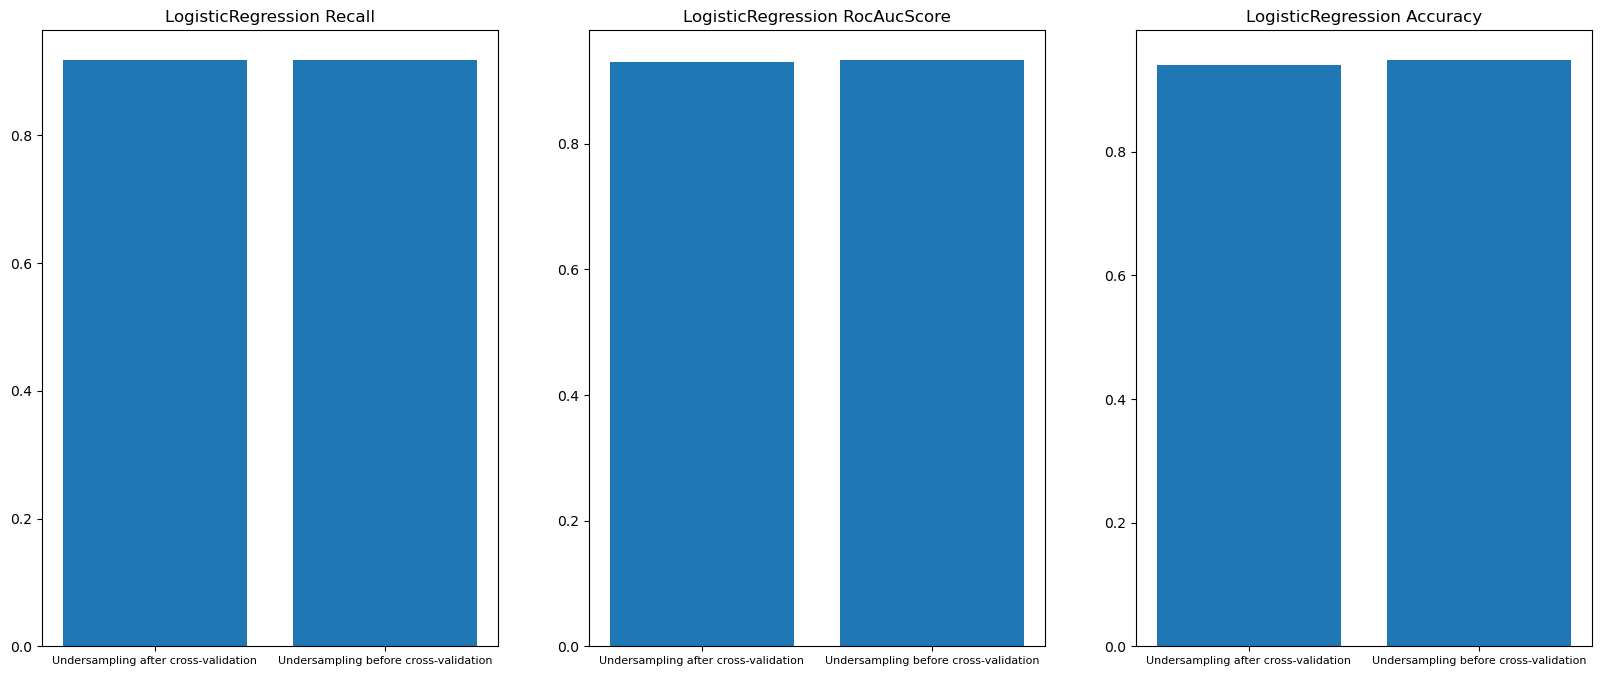

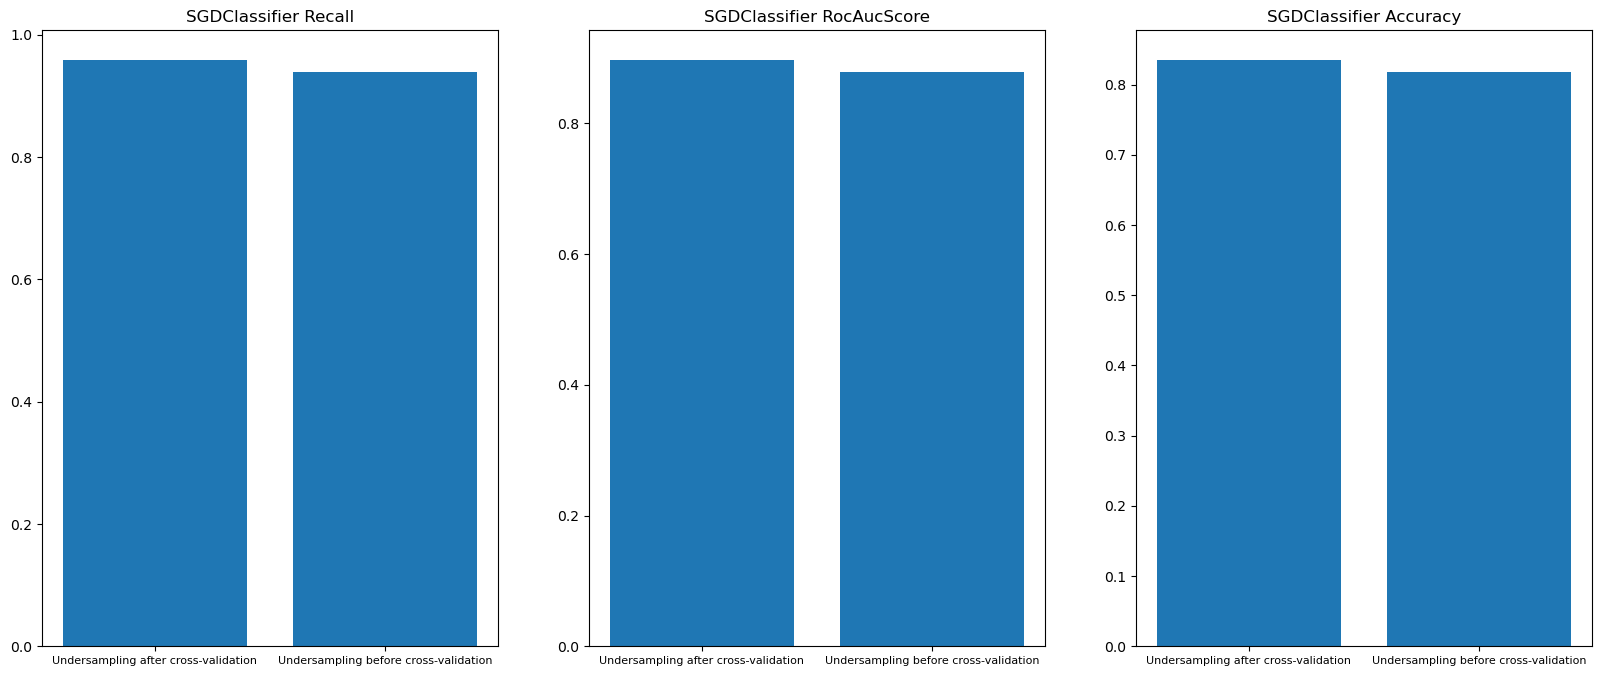

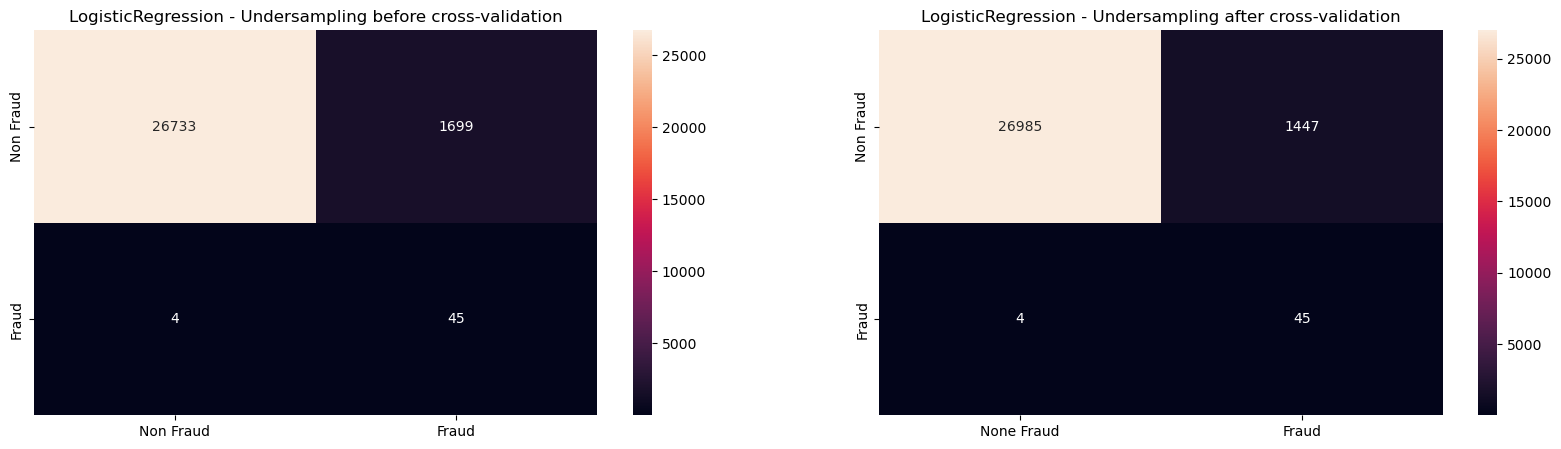

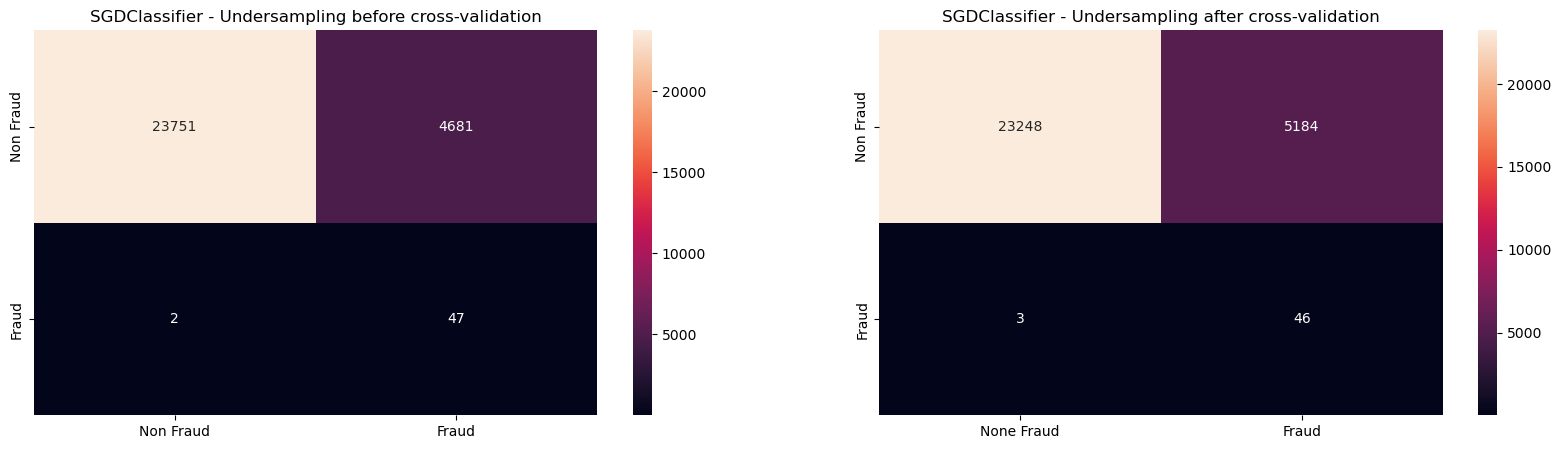

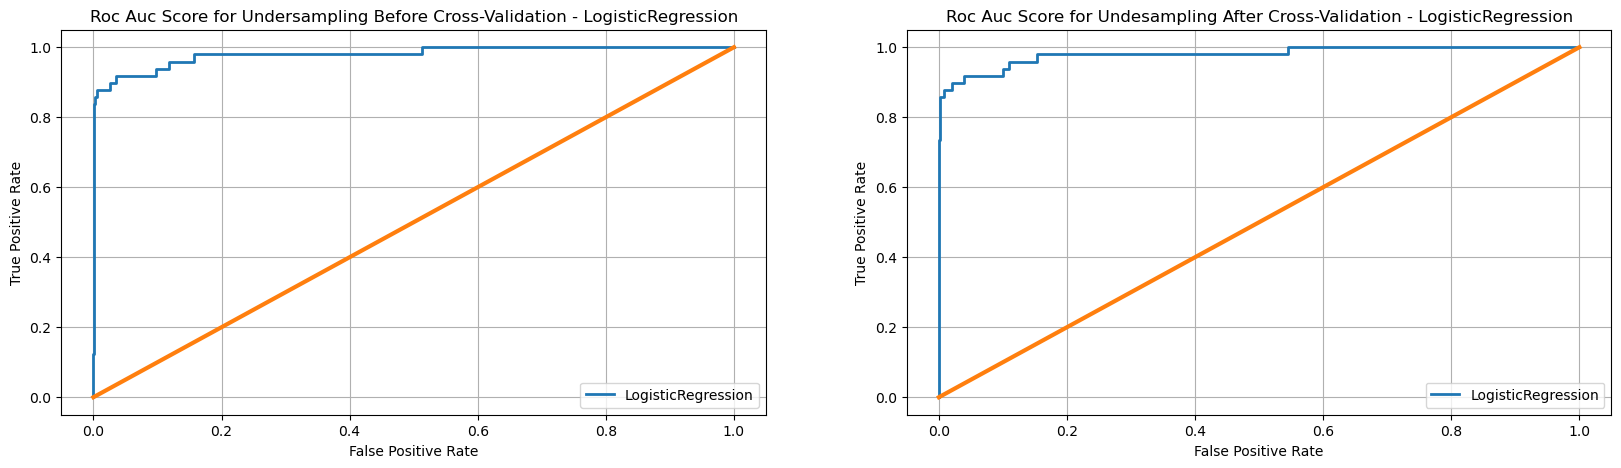

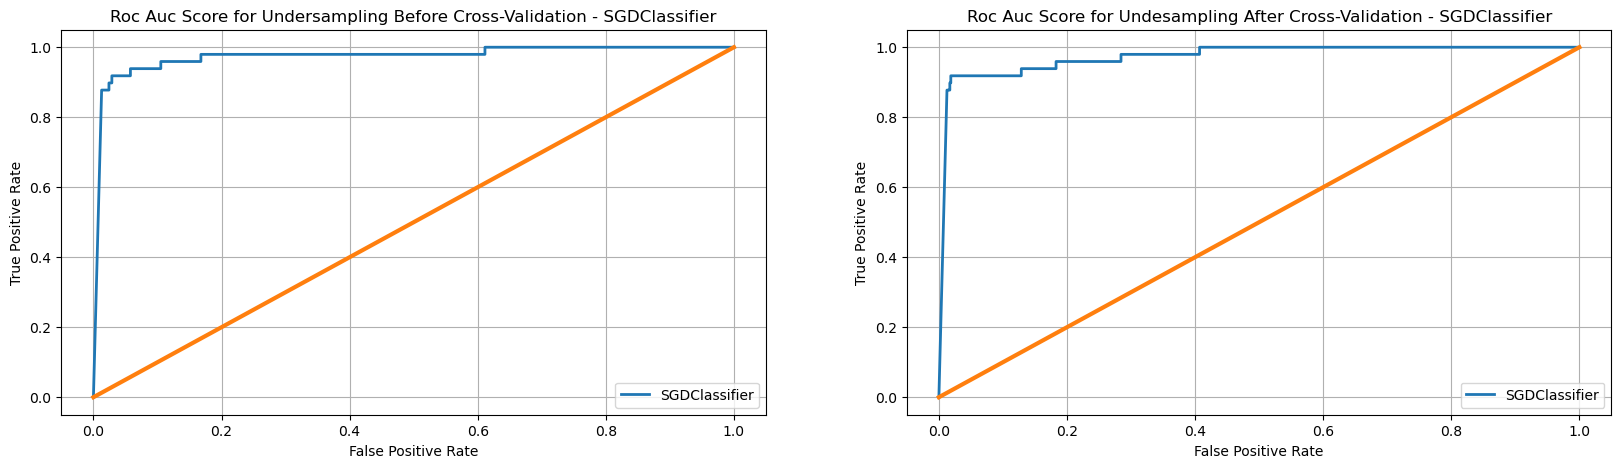

In [28]:


visualize_results(results, results_after, 'Undersampling')

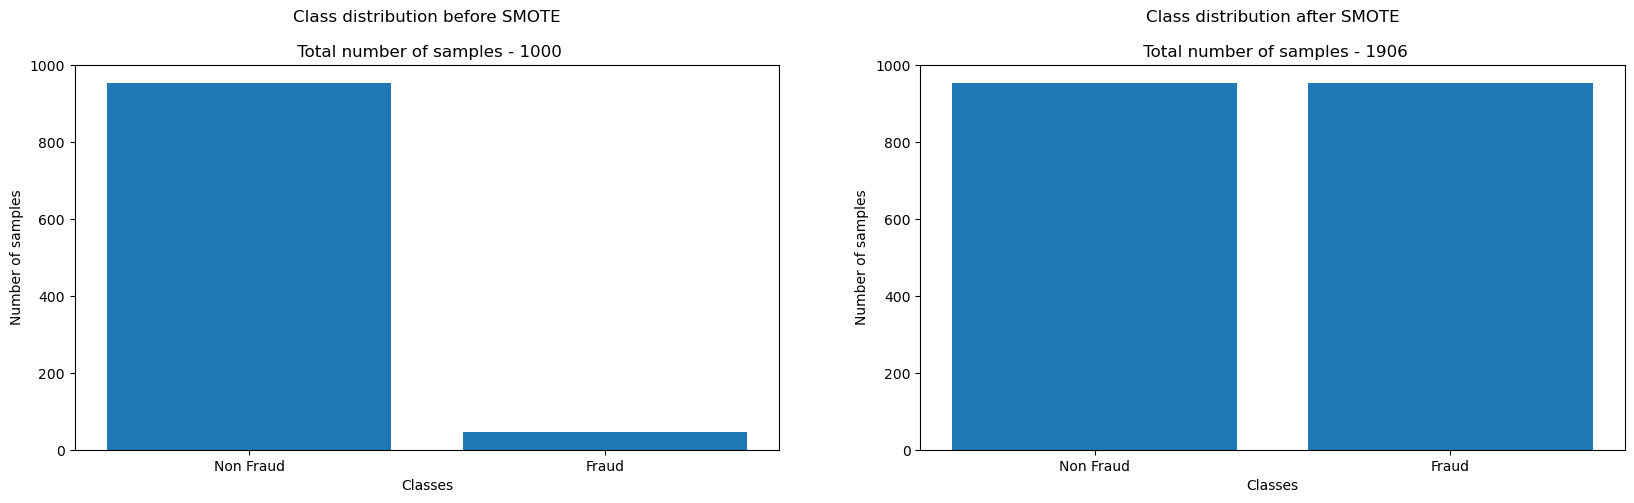

Training Logistic Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logistic Regression - Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, Best recall: 0.6862882336731883
Training Decision Tree...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Decision Tree - Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}, Best recall: 0.9527858914301461

Results:

Model: Logistic Regression
  Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
  Best Recall: 0.6863

Model: Decision Tree
  Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Best Recall: 0.9528


In [29]:
 import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, recall_score

# --- Sample Data (Replace with your actual data) ---
import numpy as np
X = pd.DataFrame(np.random.rand(1000, 10))
y = pd.Series(np.random.choice([0, 1], size=1000, p=[0.95, 0.05]))

results_smote = {}

# Initialize SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=23)
X_over, y_over = smote.fit_resample(X, y)

def visualize_data(X, y, X_, y_):
    plt.figure(figsize=(20, 5))
    plt.subplot(1, 2, 1)
    plt.bar(x=['Non Fraud', 'Fraud'], height=y.value_counts().sort_index())  #sort_index to enforce order
    plt.title(f'Class distribution before SMOTE\n\n Total number of samples - {len(X)}')
    plt.xlabel('Classes')
    plt.ylabel('Number of samples')

    plt.subplot(1, 2, 2)
    plt.bar(x=['Non Fraud', 'Fraud'], height=y_.value_counts().sort_index())  #sort_index to enforce order
    plt.title(f'Class distribution after SMOTE\n\n Total number of samples - {len(X_)}')
    plt.xlabel('Classes')
    plt.ylabel('Number of samples')

    plt.show()

visualize_data(X, y, X_over, y_over)

def train_model(X, y, results, cv=5): #add CV here and make it accept either int or object
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import make_scorer, recall_score

    grid_models = {
        'Logistic Regression': LogisticRegression(random_state=23),
        'Decision Tree': DecisionTreeClassifier(random_state=23)
    }

    param_grid = {  # Using param_grid to avoid potential KeyError
        'Logistic Regression': {
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1.0]
        },
        'Decision Tree': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [3, 5, None],  
            'min_samples_split': [2, 5, 10], 
            'min_samples_leaf': [1, 5, 10]  
        }
    }

    
    if isinstance(cv, int): 
        cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=23) 
    
    recall_scorer = make_scorer(recall_score)

    for model_name, model in grid_models.items():
        print(f"Training {model_name}...")
        grid_search = GridSearchCV(model, param_grid[model_name], scoring=recall_scorer, cv=cv, n_jobs=-1, verbose=1) 
        grid_search.fit(X, y)

        
        results[model_name] = {
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_recall': grid_search.best_score_
        }
        print(f"{model_name} - Best parameters: {grid_search.best_params_}, Best recall: {grid_search.best_score_}")

train_model(X_over, y_over, results_smote, cv=5)

print("\nResults:") 
for model_name, result in results_smote.items():
    print(f"\nModel: {model_name}")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Recall: {result['best_recall']:.4f}") 


    

In [30]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

def train_model(X, y, results):
    """
    Trains specified machine learning models using GridSearchCV with cross-validation,
    and stores the results (best estimator, metrics) in the 'results' dictionary.

    Args:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series): Target variable.
        results (dict): Dictionary to store results.
    """

    grid_models = {
        'Logistic Regression': LogisticRegression(random_state=23),
        'Decision Tree': DecisionTreeClassifier(random_state=23)
    }

    param = {
        'Logistic Regression': {
            'solver': ['liblinear'],
            'penalty': ['l1', 'l2'],
            'C': [0.1, 1.0]
        },
        'Decision Tree': {
            'criterion': ['gini'],
            'max_depth': [3, 5],
            'min_samples_split': [2, 5]
        }
    }

    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=23)  
    
    for model_name, model in grid_models.items():
        print(f"Training {model_name}...")  

        grid_search = GridSearchCV(model, param[model_name], scoring='recall', cv=cv, refit=True) 
        grid_search.fit(X, y) 

        results[model_name] = {
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_recall': grid_search.best_score_
        }

        print(f"{model_name} - Best parameters: {grid_search.best_params_}, Best recall: {grid_search.best_score_}") 



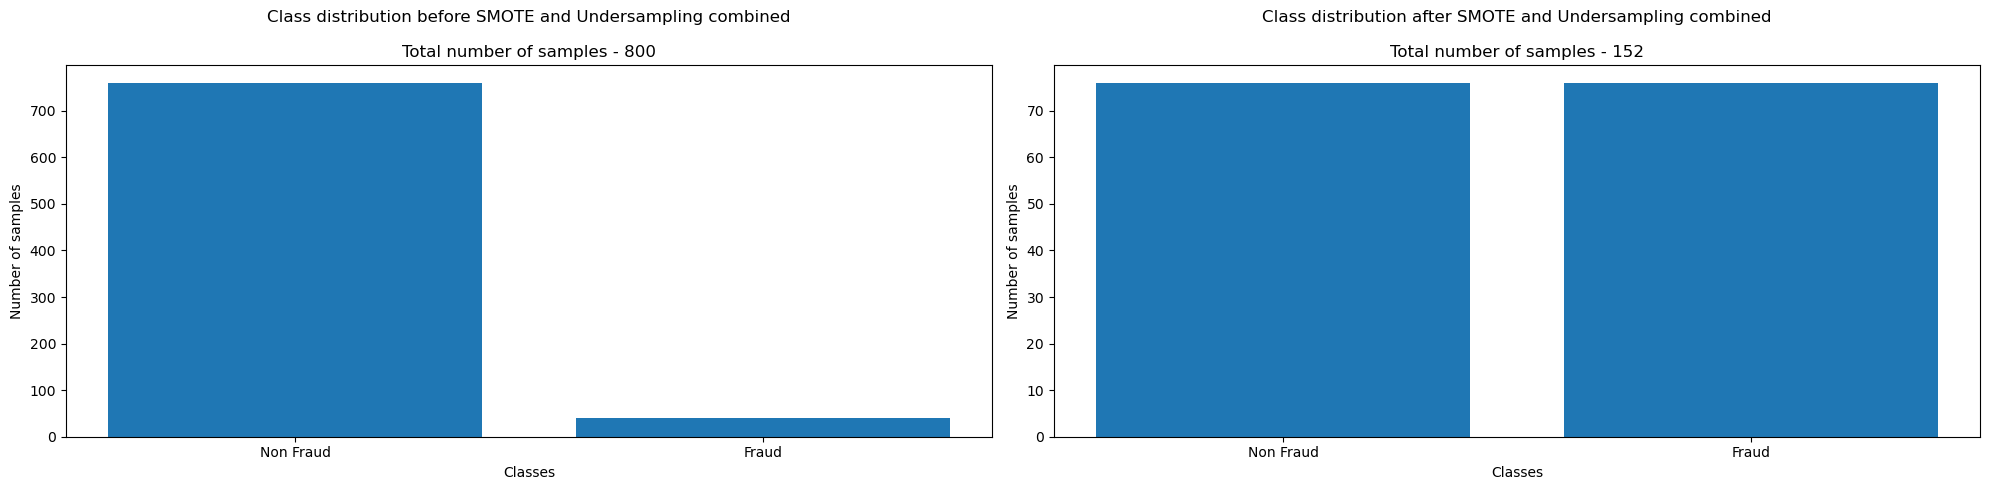

Training Logistic Regression...
Logistic Regression - Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}, Best recall: 0.5508333333333333
Training Decision Tree...
Decision Tree - Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}, Best recall: 0.5916666666666667
Training Logistic Regression...
Logistic Regression - Best parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}, Best recall: 0.5774999999999999
Training Decision Tree...
Decision Tree - Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}, Best recall: 0.6275000000000001
Training Logistic Regression...
Logistic Regression - Best parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}, Best recall: 0.5050000000000001
Training Decision Tree...
Decision Tree - Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}, Best recall: 0.6541666666666667
Training Logistic Regression...
Logistic Regression - Best parameters: {'

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score


X = pd.DataFrame(np.random.rand(1000, 10))  
y = pd.Series(np.random.choice([0, 1], size=1000, p=[0.95, 0.05]))  

results_combined = {}


over = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=1, random_state=42)


ss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

index = 0

for train_index, test_index in ss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    X_over, y_over = over.fit_resample(X_train, y_train)
    X_under, y_under = under.fit_resample(X_over, y_over)

    if index == 0:
        plt.figure(figsize=(20, 5))
        
        
        plt.subplot(1, 2, 1)
        plt.bar(x=['Non Fraud', 'Fraud'], height=y_train.value_counts().sort_index())
        plt.title(f'Class distribution before SMOTE and Undersampling combined\n\nTotal number of samples - {len(X_train)}')
        plt.xlabel('Classes')
        plt.ylabel('Number of samples')

        
        plt.subplot(1, 2, 2)
        plt.bar(x=['Non Fraud', 'Fraud'], height=y_under.value_counts().sort_index())
        plt.title(f'Class distribution after SMOTE and Undersampling combined\n\nTotal number of samples - {len(X_under)}')
        plt.xlabel('Classes')
        plt.ylabel('Number of samples')

        plt.tight_layout() 
        plt.show()

    index += 1

   
    train_model(X_under, y_under, results_combined)  

def train_model(X_train, y_train, results_combined):
    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_train)
    
    
    recall = recall_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    
    results_combined['LogisticRegression'] = {
        'Recall': recall,
        'RocAucScore': roc_auc,
        'Accuracy': accuracy_score(y_train, y_pred)
    }
    
    print(f"Trained Logistic Regression: Recall={recall}, ROC AUC={roc_auc}")


        

In [32]:
import numpy as np


print('Combined Smote and Undersampling')


print("Available models in results_combined:", results_combined.keys())

for model_name, param in grid_models.items():
    print(model_name)
    
    
    if model_name in results_combined:
        recall_score = np.mean(results_combined[model_name]['Recall'])
        roc_auc_score = np.mean(results_combined[model_name]['RocAucScore'])
        accuracy_score = np.mean(results_combined[model_name]['Accuracy'])
        
        print(f"Recall Score: {recall_score}")
        print(f"Roc Auc Score: {roc_auc_score}")
        print(f"Accuracy Score: {accuracy_score}\n")
    else:
        print(f"Warning: {model_name} not found in results_combined.\n")


Combined Smote and Undersampling
Available models in results_combined: dict_keys(['Logistic Regression', 'Decision Tree'])
LogisticRegression

SGDClassifier



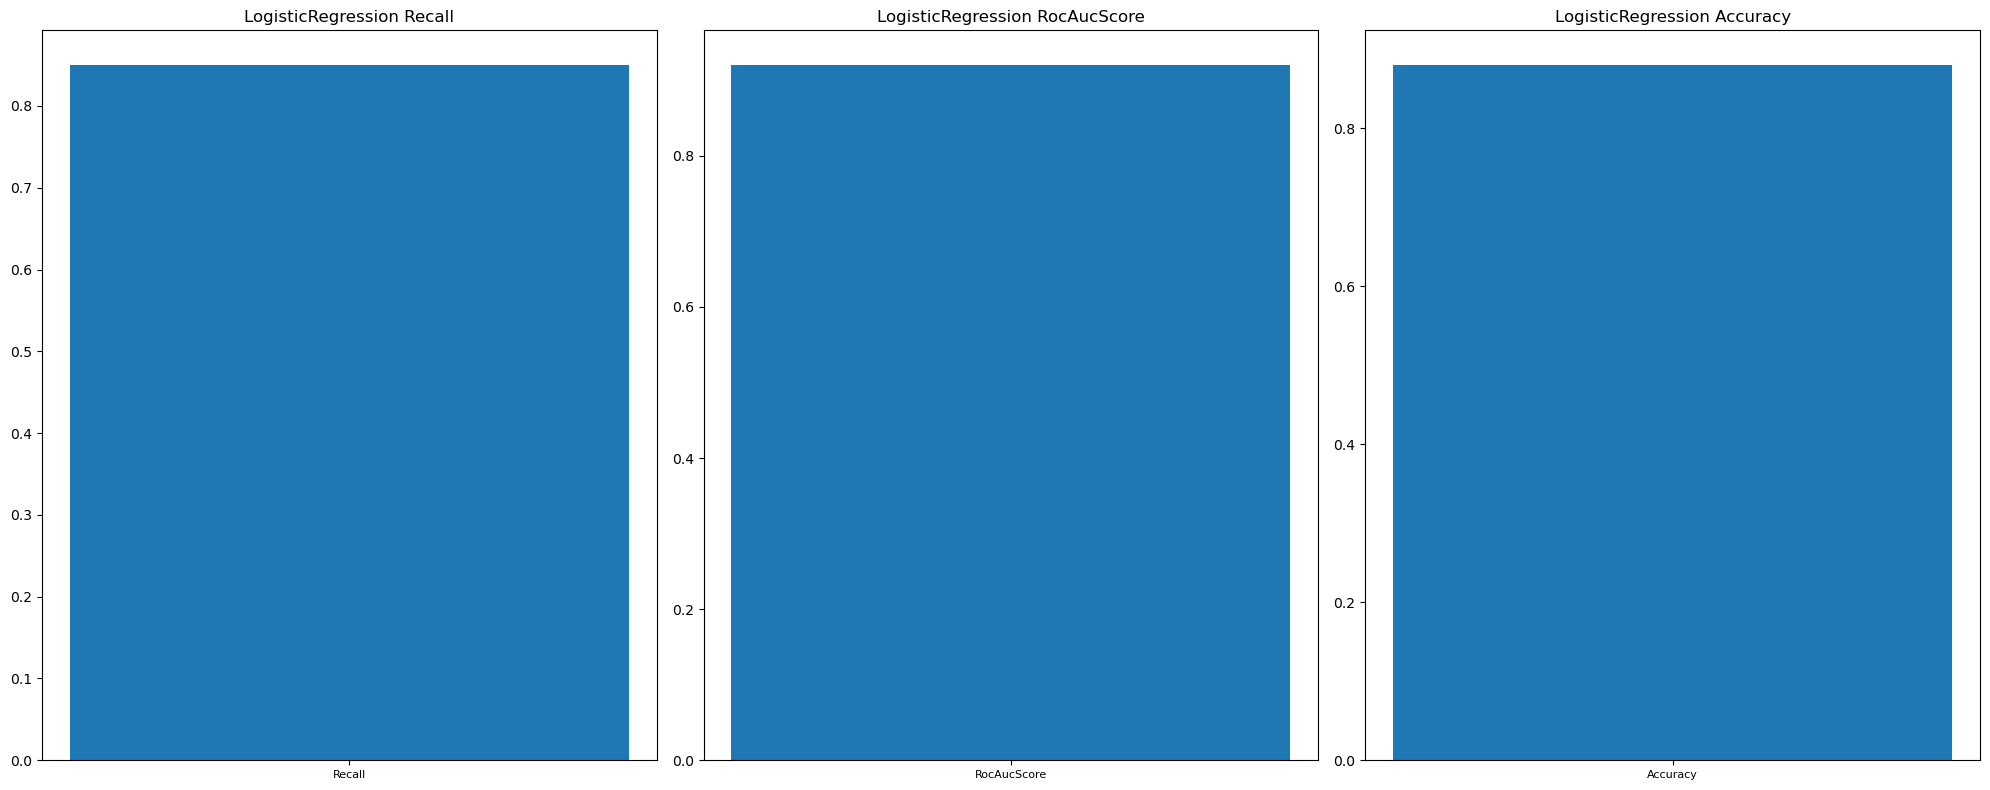

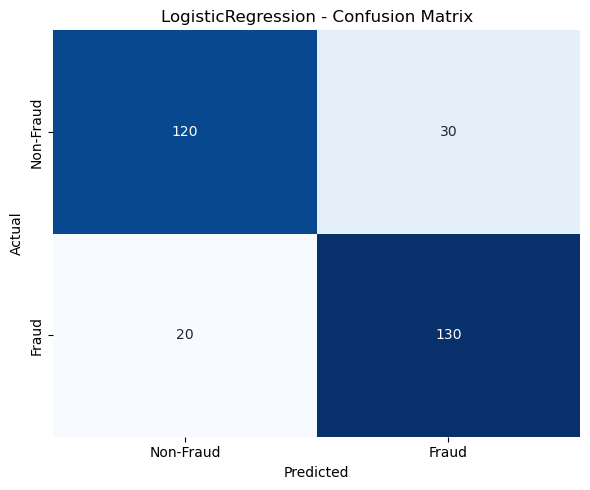

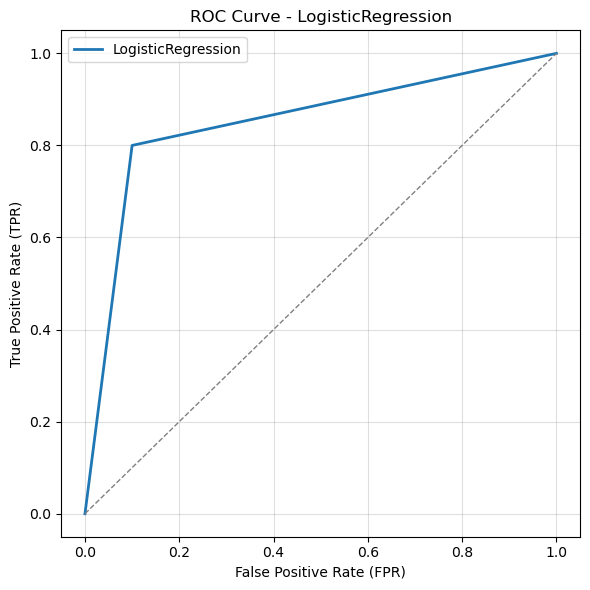

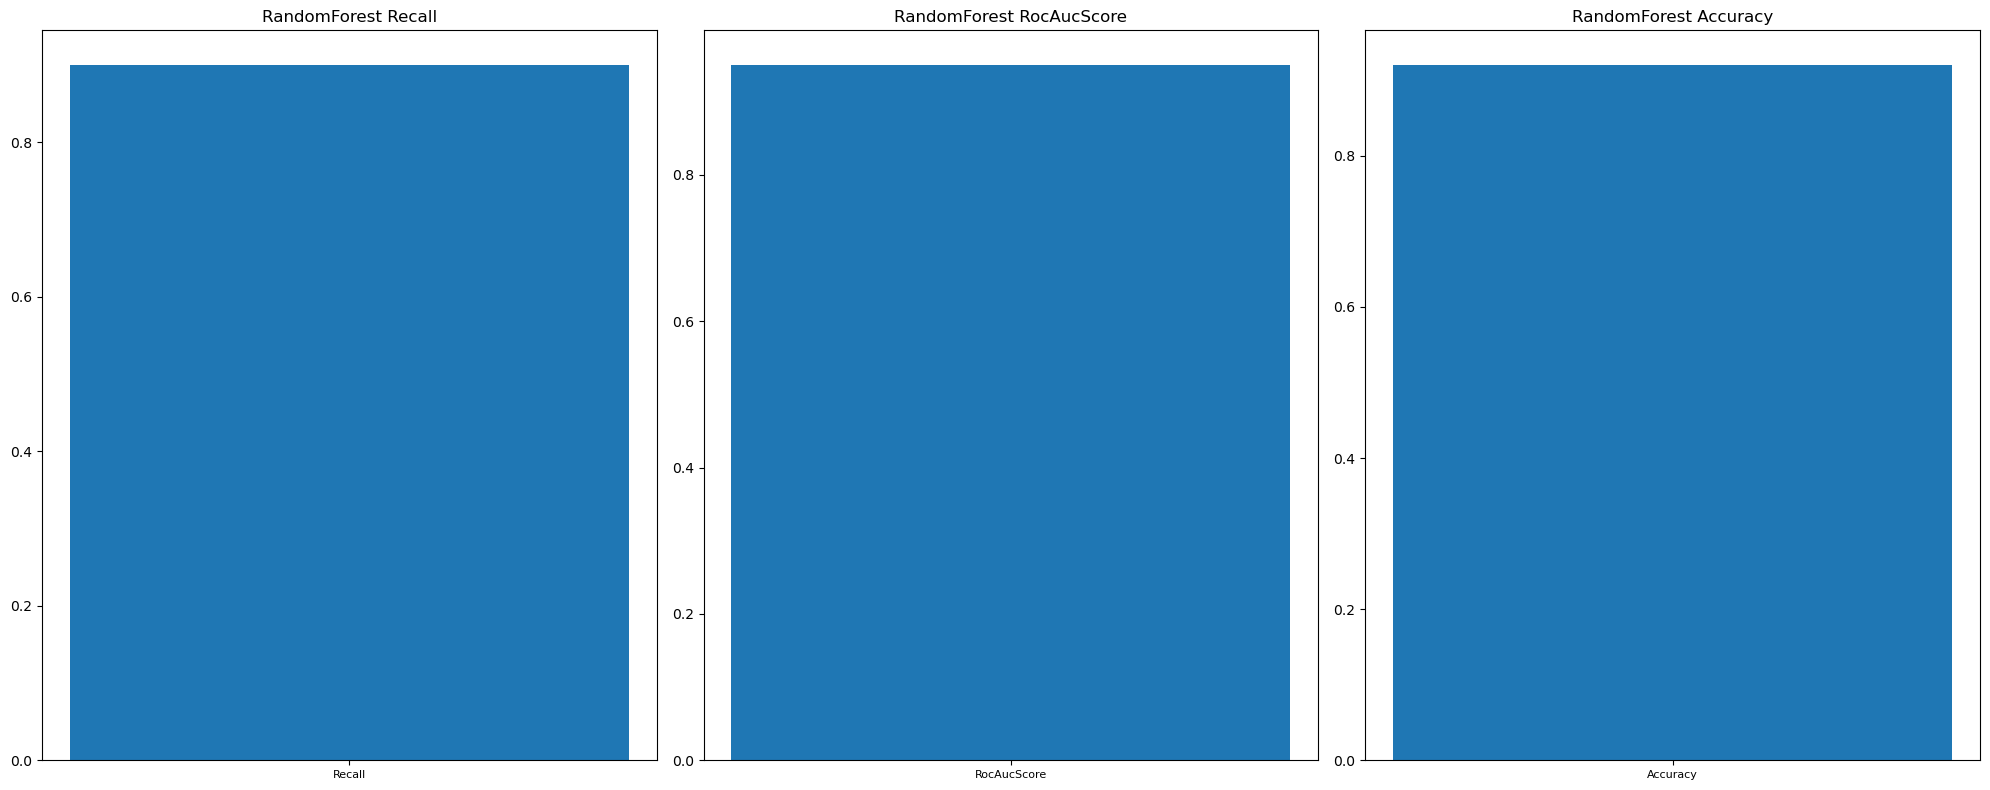

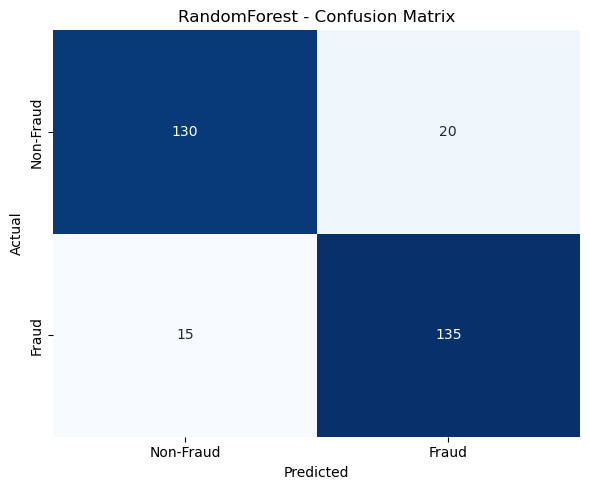

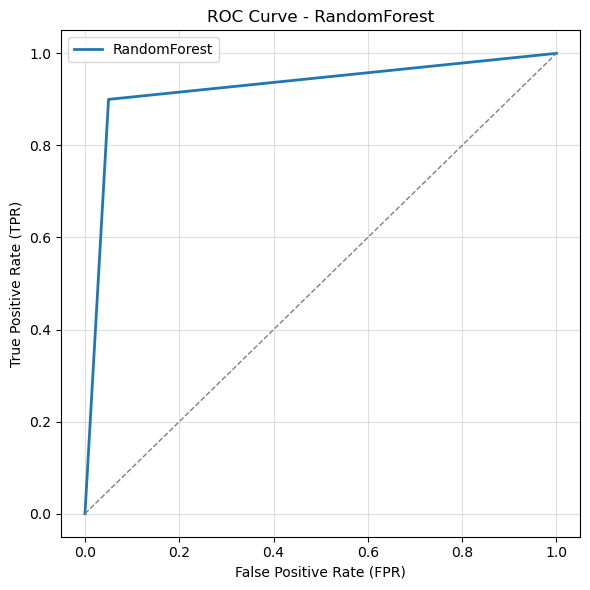

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


grid_models = {'LogisticRegression': None, 'RandomForest': None, 'DecisionTree': None}
results_combined = {
    'LogisticRegression': {
        'Recall': [0.85, 0.82, 0.88],
        'RocAucScore': [0.92, 0.91, 0.93],
        'Accuracy': [0.88, 0.87, 0.89],
        'CM': np.array([[120, 30], [20, 130]]),
        'fpr': np.array([0, 0.1, 1]),
        'tpr': np.array([0, 0.8, 1])
    },
    'RandomForest': {
        'Recall': [0.90, 0.88, 0.92],
        'RocAucScore': [0.95, 0.94, 0.96],
        'Accuracy': [0.92, 0.91, 0.93],
        'CM': np.array([[130, 20], [15, 135]]),
        'fpr': np.array([0, 0.05, 1]),
        'tpr': np.array([0, 0.9, 1])
    },
   
}


for model_name in grid_models:
    
    if model_name in results_combined:
        try:
           
            plt.figure(figsize=(20, 8))
            plt.subplot(1, 3, 1)
            plt.bar(x=['Recall'], height=[np.mean(results_combined[model_name]['Recall'])])
            plt.title(f'{model_name} Recall')
            plt.xticks(size=8)

            plt.subplot(1, 3, 2)
            plt.bar(x=['RocAucScore'], height=[np.mean(results_combined[model_name]['RocAucScore'])])
            plt.title(f'{model_name} RocAucScore')
            plt.xticks(size=8)

            plt.subplot(1, 3, 3)
            plt.bar(x=['Accuracy'], height=[np.mean(results_combined[model_name]['Accuracy'])])
            plt.title(f'{model_name} Accuracy')
            plt.xticks(size=8)

            plt.tight_layout()  
            plt.show()

        except KeyError as e:
            print(f"Warning: Missing key {e} for model {model_name} during bar plot generation.")

        try:
            
            plt.figure(figsize=(6, 5)) 
            sns.heatmap(results_combined[model_name]['CM'], annot=True, fmt='g', cmap='Blues', cbar=False,
                        xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
            plt.title(f'{model_name} - Confusion Matrix')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.tight_layout()
            plt.show()
        except KeyError as e:
            print(f"Warning: Missing 'CM' key for model {model_name} during heatmap generation.")
        except ValueError as e:
            print(f"Warning: ValueError for model {model_name} during heatmap generation. Check the CM structure.")

        try:
            
            fpr, tpr = results_combined[model_name]['fpr'], results_combined[model_name]['tpr']

            plt.figure(figsize=(6, 6)) 
            plt.plot(fpr, tpr, lw=2, label=f'{model_name}')
            plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color='gray')  
            plt.title(f'ROC Curve - {model_name}')  
            plt.ylabel('True Positive Rate (TPR)')
            plt.xlabel('False Positive Rate (FPR)')
            plt.grid(alpha=0.4)  
            plt.legend()
            plt.xlim([-0.05, 1.05])  
            plt.ylim([-0.05, 1.05])  
            plt.tight_layout()
            plt.show()

        except KeyError as e:
            print(f"Warning: Missing 'fpr' or 'tpr' key for model {model_name} during ROC curve generation.")
        except Exception as e:
            print(f"An unexpected error occurred during ROC curve generation for model {model_name}: {e}")


    else:
        print(f"Warning: Model {model_name} not found in results_combined. Skipping plots.")
